In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from Utils.styles import *

In [7]:
input_filename = "Volume_CSV/results.csv"

with open(input_filename, 'r') as f:
        ni = int(f.readline().strip().split('=')[1])
        nj = int(f.readline().strip().split('=')[1])
        nk = int(f.readline().strip().split('=')[1])
    
    
df = pd.read_csv(input_filename, skiprows=3)
data = {col: df[col].to_numpy().reshape((ni, nj, nk)) for col in df.columns}

In [8]:
blausius = np.loadtxt("blausius_table.csv", delimiter=",", skiprows=1)
eta = blausius[:, 0]
dfdeta = blausius[:, 1]
eta_dfdeta_minusf = blausius[:, 2]

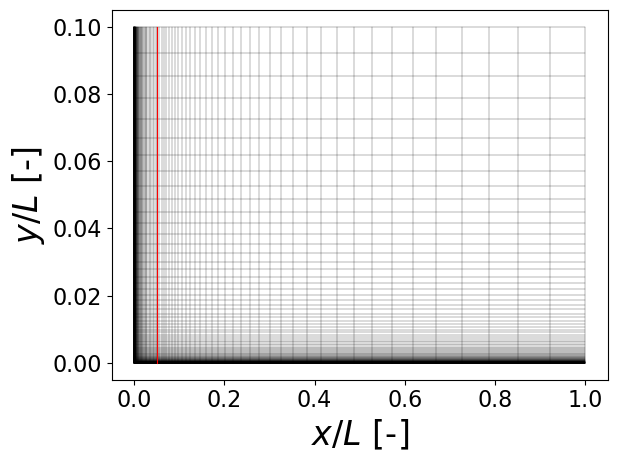

In [9]:
#plot the grid
L = data['x'][-1, 0, 0]
iChecks  = [75]

for i in range(0, ni, 1):
    plt.plot(data['x'][i, :, 0]/L, data['y'][i, :, 0]/L, '-', color='k', lw=0.2)
for j in range(0, nj, 1):
    plt.plot(data['x'][:, j, 0]/L, data['y'][:, j, 0]/L, '-', color='k', lw = 0.2)
for iCheck in iChecks:
    plt.plot(data['x'][iCheck, :, 0]/L, data['y'][iCheck, :, 0]/L, '-', color='r', lw=0.8)
# plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel(r'$x/L$ [-]')
plt.ylabel(r'$y/L$ [-]')
plt.savefig('Pictures/flatplate_grid.pdf', bbox_inches='tight')

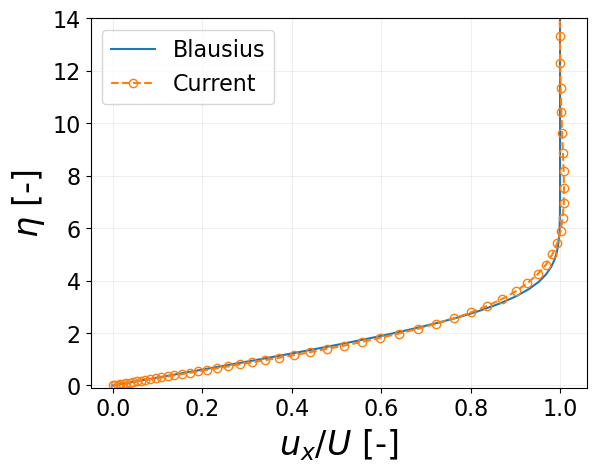

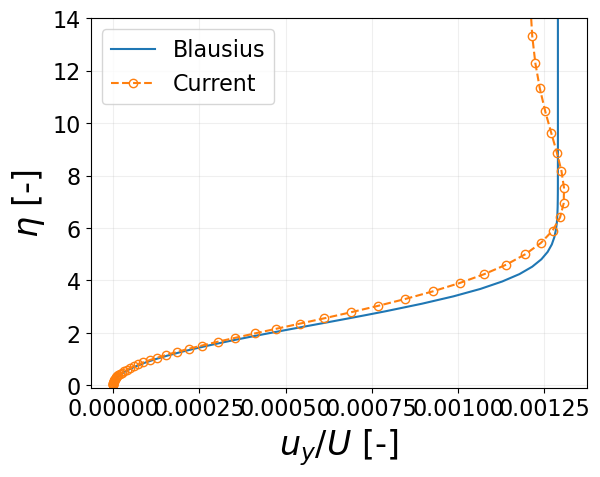

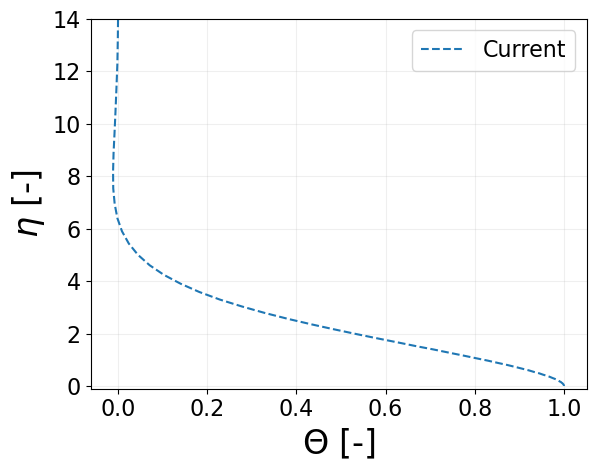

In [10]:
U = data['Velocity X'][iCheck, -1, 0]
y = data['y'][iCheck, :, 0]
x = data['x'][iCheck, :, 0]
nu = 1.48E-5

etaFlow = y / (nu * x / U)**0.5

ublausius = U * dfdeta
vblausius = 0.5 * (U * nu / x[iCheck]) ** 0.5 * eta_dfdeta_minusf

plt.figure()
plt.plot(ublausius/U, eta, label='Blausius')
plt.plot(data['Velocity X'][iCheck, :, 0]/U, etaFlow, '--o', mfc='none',label='Current')
plt.ylim(-0.1, eta.max())
plt.legend()
plt.ylabel(r'$\eta$ [-]')
plt.xlabel(r'$u_x/U$ [-]')
plt.grid(alpha=0.2)
plt.savefig('Pictures/flatplate_ux.pdf', bbox_inches='tight')

plt.figure()
plt.plot(vblausius/U, eta, label='Blausius')
plt.plot(data['Velocity Y'][iCheck, :, 0]/U, etaFlow, '--o', mfc='none',label='Current')
plt.ylim(-0.1, eta.max())
plt.legend()
plt.ylabel(r'$\eta$ [-]')
plt.xlabel(r'$u_y/U$ [-]')
plt.grid(alpha=0.2)
plt.savefig('Pictures/flatplate_uy.pdf', bbox_inches='tight')


theta = (data['Temperature'][iCheck, :, 0] - data['Temperature'][iCheck, -1, 0]) / (data['Temperature'][iCheck, 0, 0] - data['Temperature'][iCheck, -1, 0])
plt.figure()
# plt.plot(vblausius, eta, label='Blausius')
plt.plot(theta, etaFlow, '--',label='Current')
plt.ylim(-0.1, eta.max())
plt.legend()
plt.ylabel(r'$\eta$ [-]')
plt.xlabel(r'$\Theta$ [-]')
plt.grid(alpha=0.2)
plt.savefig('Pictures/flatplate_theta.pdf', bbox_inches='tight')
